# 0.1. Importações

In [1]:
import pandas         as pd
import numpy          as np
import seaborn        as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec

## 0.1.1 Supresão da Notação Científica

In [2]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.4f}'.format)

## 0.1.2 Mudança OS Path

In [4]:
import os
os.chdir('../')

# 1. Importando Data_set

In [5]:
house_data = pd.read_csv(".\data_set\kc_house_data.csv")
house_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0000,3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,538000.0000,3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,180000.0000,2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,604000.0000,4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,510000.0000,3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


In [6]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.1 Significado de cada coluna

| Nome_Coluna | Tradução | Descrição |
| ----------- | -------- | --------- |
| id | id | ID exclusivo para cada casa vendida |
| date | data_venda | Data da venda da casa |
| price | preco | Preço de cada casa vendida |
| bedrooms | quartos | Número de quartos |
| bedrooms | banheiros | Número de banheiros, onde 0,5 representa um quarto com vaso sanitário, mas sem chuveiro |
| sqft_living | m2_construido_total | Metragem quadrada do espaço interior dos apartamentos |
| sqft_lot | m2_terreno_total | Metragem quadrada do espaço terrestre |
| floors | andares | Número de andares |
| waterfront | vista_agua | Variável fictícia para saber se o apartamento estava com vista para a orla ou não |
| view | vista_geral | Índice de 0 a 4 de quão boa era a vista do imóvel. 0 é a pior vista e 4 é a melhor vista |
| condition | condicao | Índice de 1 a 5 sobre a condição do apartamento. 1 é a pior condição e 5 é a melhor |
| grade | nivel_construcao | Índice de 1 a 13, onde 1-3 fica aquém da construção e design de edifícios, 7 tem um nível médio de construção e design e 11-13 tem um alto nível de construção e design. |
| sqft_above | m2_construidos_chao | Metragem quadrada do espaço interno da habitação que está acima do nível do solo |
| sqft_basement | m2_porao | Metragem quadrada do espaço interno da habitação que está abaixo do nível do solo |
| yr_built | ano_construído | Ano em que a casa foi construída |
| yr_renovated | ano_reformado | Ano da última reforma da casa |
| zipcode | cep | Em que área de código postal a casa está |
| lat | latitude | latitude |
| long | longitude | longitude |
| sqft_living15 | nao_traduzido | Metragem quadrada do espaço habitacional interior para os 15 vizinhos mais próximos |
| sqft_lot15 | nao_traduzido | A metragem quadrada dos lotes dos 15 vizinhos mais próximos |

## 1.2 Transformação dos dados

In [7]:
# Modificações indicadas no arquivo Análise_Inicial.ipynb:
# Modificação do waterfront ficara para frente.

house_data['date'] = pd.to_datetime(house_data['date'])

house_data.drop(columns=['sqft_living15','sqft_lot15'], inplace=True)
house_data.drop_duplicates(['id'],inplace=True)

house_data.loc[house_data['bedrooms'] == 33, 'bedrooms'] = 3

# Mudando de pés2 para m2
house_data['sqft_living'] = house_data['sqft_living'].apply(lambda x: x*0.09290304)
house_data['sqft_lot'] = house_data['sqft_lot'].apply(lambda x: x*0.09290304)
house_data['sqft_above'] = house_data['sqft_above'].apply(lambda x: x*0.09290304)
house_data['sqft_basement'] = house_data['sqft_basement'].apply(lambda x: x*0.09290304)

house_data.rename(columns = {'id': 'id', 'date': 'data_venda', 'price':'preco', 'bedrooms':'quartos', 'bathrooms':'banheiros',
                          'sqft_living': 'm2_construido_total','sqft_lot':'m2_terreno_total', 'floors':'andares', 'waterfront':'vista_agua',
                          'view':'vista_geral', 'condition':'condicao', 'grade':'nivel_construcao','sqft_above':'m2_construidos_chao',
                          'sqft_basement':'m2_porao', 'yr_built':'ano_construido', 'yr_renovated':'ano_reformado', 'zipcode':'cep',
                          'lat':'latitude', 'long':'longitude'}, inplace=True)

house_data.head(5)

,id,data_venda,preco,quartos,banheiros,m2_construido_total,m2_terreno_total,andares,vista_agua,vista_geral,condicao,nivel_construcao,m2_construidos_chao,m2_porao,ano_construido,ano_reformado,cep,latitude,longitude
0,7129300520,2014-10-13,221900.0000,3,1.0000,109.6256,524.9022,1.0000,0,0,3,7,109.6256,0.0000,1955,0,98178,47.5112,-122.2570
1,6414100192,2014-12-09,538000.0000,3,2.2500,238.7608,672.8038,2.0000,0,0,3,7,201.5996,37.1612,1951,1991,98125,47.7210,-122.3190
2,5631500400,2015-02-25,180000.0000,2,1.0000,71.5353,929.0304,1.0000,0,0,3,6,71.5353,0.0000,1933,0,98028,47.7379,-122.2330
3,2487200875,2014-12-09,604000.0000,4,3.0000,182.0900,464.5152,1.0000,0,0,5,7,97.5482,84.5418,1965,0,98136,47.5208,-122.3930
4,1954400510,2015-02-18,510000.0000,3,2.0000,156.0771,750.6566,1.0000,0,0,3,8,156.0771,0.0000,1987,0,98074,47.6168,-122.0450


In [8]:
house_data.dtypes

id                              int64
data_venda             datetime64[ns]
preco                         float64
quartos                         int64
banheiros                     float64
m2_construido_total           float64
m2_terreno_total              float64
andares                       float64
vista_agua                      int64
vista_geral                     int64
condicao                        int64
nivel_construcao                int64
m2_construidos_chao           float64
m2_porao                      float64
ano_construido                  int64
ano_reformado                   int64
cep                             int64
latitude                      float64
longitude                     float64
dtype: object

# 2. Exploração dos dados

## 2.1 Atributos

O que fazer:

1. Verificar Atributos - ok
2. Criar tabela da estatística Descritiva
3. Criar tabelas diversas
4. Pensar em Hipóteses.
5. Testar as Hipóteses.

### Lista de atributos



In [9]:
# Overview dos Atributos
atributos_unicos = house_data[['quartos','banheiros','andares','vista_agua','vista_geral','condicao','nivel_construcao']]

for i in atributos_unicos:
    print(f'Atributo: {i} - {atributos_unicos[i].sort_values().unique().tolist()}')

Atributo: quartos - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Atributo: banheiros - [0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]
Atributo: andares - [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
Atributo: vista_agua - [0, 1]
Atributo: vista_geral - [0, 1, 2, 3, 4]
Atributo: condicao - [1, 2, 3, 4, 5]
Atributo: nivel_construcao - [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


## 2.2 Estatística

In [10]:
# Medidas de tentencia central - Média, Mediana, Moda
# Medidas de dispersão - std, min, max, assimetria, Curtose

skewness = house_data.skew()
kurtosis = house_data.kurtosis()

tabela_estatistica = pd.DataFrame (house_data.describe().T)
tabela_estatistica = pd.concat([tabela_estatistica,skewness,kurtosis], axis=1)
tabela_estatistica.columns = ['Count','Media','Std','Min','25%','Median','75%','Max','Skew','Kurtosis']

tabela_estatistica

C:\Users\gbnob\AppData\Local\Temp\ipykernel_3220\88589275.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = house_data.skew()
C:\Users\gbnob\AppData\Local\Temp\ipykernel_3220\88589275.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis = house_data.kurtosis()


,Count,Media,Std,Min,25%,Median,75%,Max,Skew,Kurtosis
id,21436.0000,4580765328.1779,2876589633.6731,1000102.0000,2123700078.7500,3904921185.0000,7308675062.5000,9900000190.0000,0.2432,-1.2606
preco,21436.0000,540529.2872,367689.2965,75000.0000,322150.0000,450000.0000,645000.0000,7700000.0000,4.0285,34.6191
quartos,21436.0000,3.3702,0.9069,0.0000,3.0000,3.0000,4.0000,11.0000,0.5180,1.8528
banheiros,21436.0000,2.1173,0.7699,0.0000,1.7500,2.2500,2.5000,8.0000,0.5102,1.2915
m2_construido_total,21436.0000,193.4896,85.3915,26.9419,132.8513,178.3738,236.9028,1257.9072,1.4710,5.2491
m2_terreno_total,21436.0000,1406.1468,3859.0641,48.3096,468.2313,707.3637,993.7141,153416.2712,13.0437,284.0835
andares,21436.0000,1.4962,0.5404,1.0000,1.0000,1.5000,2.0000,3.5000,0.6105,-0.4908
vista_agua,21436.0000,0.0076,0.0869,0.0000,0.0000,0.0000,0.0000,1.0000,11.3373,126.5467
vista_geral,21436.0000,0.2351,0.7671,0.0000,0.0000,0.0000,0.0000,4.0000,3.3867,10.8305
condicao,21436.0000,3.4104,0.6502,1.0000,3.0000,3.0000,4.0000,5.0000,1.0362,0.5175


## 2.2 Visão geral por Histograma

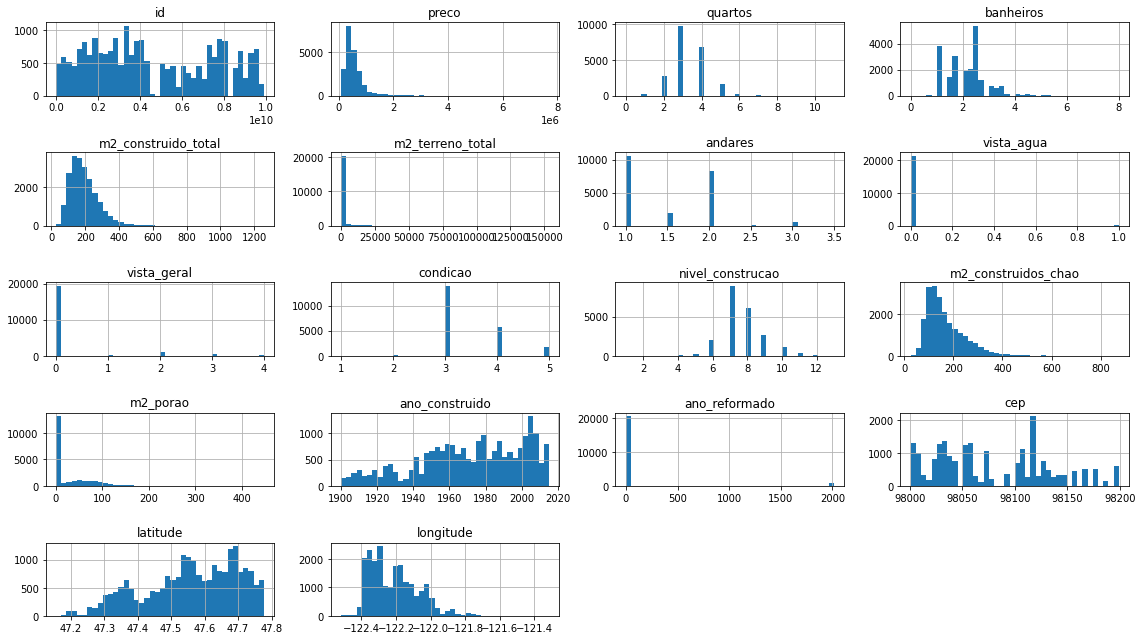

In [11]:
var_numericas_2 = house_data.select_dtypes(include=['int64','float64','int32','float32'])

var_numericas_2.hist(figsize=(16,9), bins=40);
plt.tight_layout()

# 3. Negócio e Hipoteses

## 3.1 Perguntas de negócio

N1: Quais são os melhores imóveis e por quanto comprar?

N2: Qual o melhor período de venda dos imóveis e por quanto vender?

Para entender o melhor período de compra e venda devemos olhar para os atributos selecionados:
1. Sazonalidade (4 Estações do ano).
2. Valor dos imóveis próximos.
3. Qualidade do Imóvel.
4. Vista do Imóvel.

## 3.2 Hipóteses a serem exploradas

H1: Imóveis que possuem vista para água são 30% mais caros, na média.

H2: Imóveis com data de construção menor do que 1955, são 50% mais baratos, na média.

H3: Imóveis sem porão possuem m2_construcao_total 50% maiores do que com porão, na média.

H4: O Crescimento do preço dos imóveis YoY (Year over Year) é de 10%.

H5: Imóveis com 3 banheiros tem um crescimento no Preço MoM (Month of Month) de 15%.

H6: Imóveis no inverno são 20% mais baratos do que o resto do ano.

H7: Pelo menos 80% dos imóveis com condição 4 e 5 tem níveis de construção 7 ou mais.

H8: Pelo menos 80% dos imóveis com vista para água possuem nível de construção 10 ou mais.

# 4. Features

1. Filtro data de construção 1955.
2. Filtro Porão.
3. Filtro por Mês.
4. Filtro por Sazonalidade.
5. Filtro Condição.
6. Filtro Nível de Construção.

In [12]:
df = house_data.copy()

# Filtro Ano de Construção <> 1955
# Se construção >= 1955 == 0 senão < 1955
df['construcao_1955'] = df['ano_construido'].apply(lambda construcao : 0 if construcao >= 1955 else 1)

# Filtro por Porão
# Se Sem Porão == 0 se não 1
df['sem_porao'] = df['m2_porao'].apply(lambda x : 0 if x == 0 else 1)

# Filtro de Temporariedade
#Filtro Ano
df['ano_venda'] = pd.to_datetime(df['data_venda']).dt.year
# Filtro Mês
df['mes'] = pd.to_datetime(df['data_venda']).dt.month
# Filtro Sazonalidade
# Primavera -> Março 03 a Maio 05
# Verão -> Junho 06 a Agosto 08
# Outono -> Setembro 09 a Novembro 11
# Inverno -> Dezembro 12 a Fevereiro 02
df['estacoes'] = df['mes'].apply(lambda mes: 'primavera' if (mes >= 3) & (mes <= 5) else
                                           'verao' if (mes >= 6) & (mes <= 8) else
                                           'outono' if (mes >= 9) & (mes <= 11) else
                                           'inverno')

# Filtro de Condição do Imóvel
# boa condição == 1
# má condição == 0
df['boa_condicao'] = df['condicao'].apply(lambda condicao: 1 if condicao >= 4 else 0)

# Filtro Nível de Construção
# bom nível de construcao == 1
# má nível de construcao == 0
df['bom_nivel_construcao'] = df['nivel_construcao'].apply(lambda nivel: 1 if nivel >= 10 else 0)

# Vamos ver como ficou? Ta lindo
df[['ano_construido','construcao_1955','sem_porao','m2_porao','ano_venda','mes','estacoes',
    'boa_condicao','condicao','bom_nivel_construcao','nivel_construcao']].head(15)

,ano_construido,construcao_1955,sem_porao,m2_porao,ano_venda,mes,estacoes,boa_condicao,condicao,bom_nivel_construcao,nivel_construcao
0,1955,0,0,0.0000,2014,10,outono,0,3,0,7
1,1951,1,1,37.1612,2014,12,inverno,0,3,0,7
2,1933,1,0,0.0000,2015,2,inverno,0,3,0,6
3,1965,0,1,84.5418,2014,12,inverno,1,5,0,7
4,1987,0,0,0.0000,2015,2,inverno,0,3,0,8
5,2001,0,1,142.1417,2014,5,primavera,0,3,1,11
6,1995,0,0,0.0000,2014,6,verao,0,3,0,7
7,1963,0,0,0.0000,2015,1,inverno,0,3,0,7
8,1960,0,1,67.8192,2015,4,primavera,0,3,0,7
9,2003,0,0,0.0000,2015,3,primavera,0,3,0,7


## 4.1 Estatísticas + Features

In [13]:
skewness = df.skew()
kurtosis = df.kurtosis()

tabela_estatistica_2 = pd.DataFrame (df.describe().T)
tabela_estatistica_2 = pd.concat([tabela_estatistica_2,skewness,kurtosis], axis=1)
tabela_estatistica_2.columns = ['Count','Media','Std','Min','25%','Median','75%','Max','Skew','Kurtosis']
tabela_estatistica_2

C:\Users\gbnob\AppData\Local\Temp\ipykernel_3220\2428533304.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()
C:\Users\gbnob\AppData\Local\Temp\ipykernel_3220\2428533304.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis = df.kurtosis()


,Count,Media,Std,Min,25%,Median,75%,Max,Skew,Kurtosis
id,21436.0000,4580765328.1779,2876589633.6731,1000102.0000,2123700078.7500,3904921185.0000,7308675062.5000,9900000190.0000,0.2432,-1.2606
preco,21436.0000,540529.2872,367689.2965,75000.0000,322150.0000,450000.0000,645000.0000,7700000.0000,4.0285,34.6191
quartos,21436.0000,3.3702,0.9069,0.0000,3.0000,3.0000,4.0000,11.0000,0.5180,1.8528
banheiros,21436.0000,2.1173,0.7699,0.0000,1.7500,2.2500,2.5000,8.0000,0.5102,1.2915
m2_construido_total,21436.0000,193.4896,85.3915,26.9419,132.8513,178.3738,236.9028,1257.9072,1.4710,5.2491
m2_terreno_total,21436.0000,1406.1468,3859.0641,48.3096,468.2313,707.3637,993.7141,153416.2712,13.0437,284.0835
andares,21436.0000,1.4962,0.5404,1.0000,1.0000,1.5000,2.0000,3.5000,0.6105,-0.4908
vista_agua,21436.0000,0.0076,0.0869,0.0000,0.0000,0.0000,0.0000,1.0000,11.3373,126.5467
vista_geral,21436.0000,0.2351,0.7671,0.0000,0.0000,0.0000,0.0000,4.0000,3.3867,10.8305
condicao,21436.0000,3.4104,0.6502,1.0000,3.0000,3.0000,4.0000,5.0000,1.0362,0.5175


## 4.2 Visão Geral por Histograma

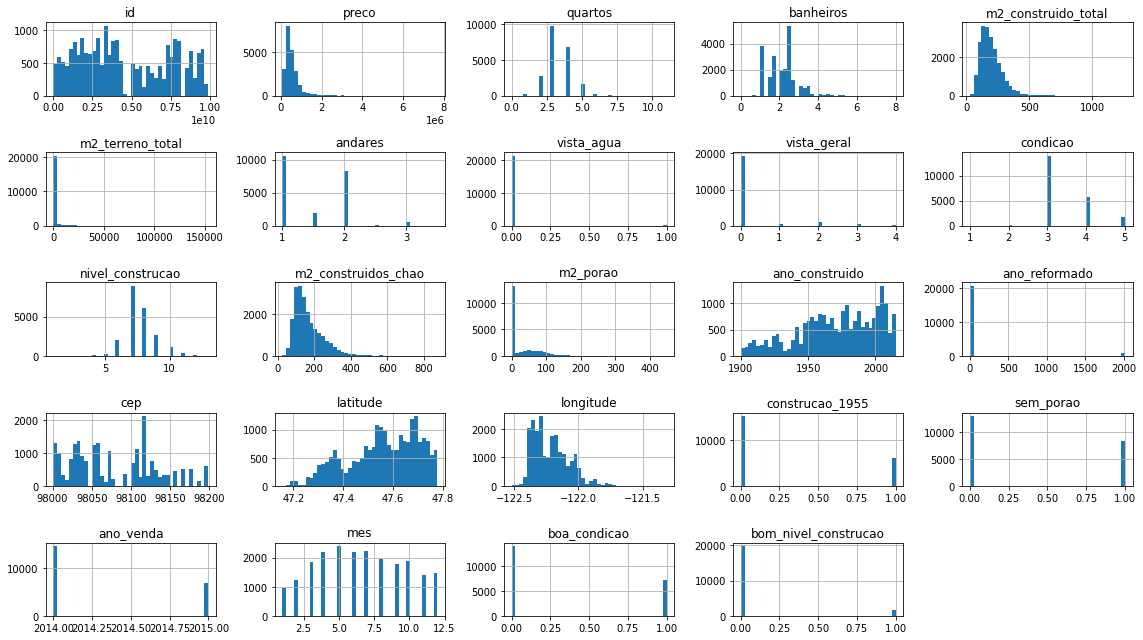

In [14]:
var_numericas_2 = df.select_dtypes(include=['int64','float64','int32','float32'])

var_numericas_2.hist(figsize=(16,9), bins= 40)
plt.tight_layout()

In [15]:
# Só estou testando algumas fuções

# teste = df[[ 'ano_construido', 'm2_terreno_total']].groupby('ano_construido').median().reset_index()
# sns.lineplot(data = teste, x= 'ano_construido', y='m2_terreno_total')

# teste_2 = teste.loc[teste['ano_construido'] < 1950].sort_values(by = 'm2_terreno_total',ascending= False)
# teste_2.head(15)

## 4.3 Respondendo as Hipóteses

### H1: Imóveis que possuem vista para água são 30% mais caros, na média.

H1 é falsa, pois os imóveis com vista para a água, em média, são 212.42% mais caros.


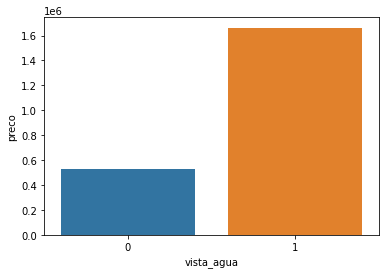

In [16]:
h1 = df[['preco','vista_agua']].groupby('vista_agua').mean().reset_index()

sns.barplot(data=h1, x='vista_agua', y='preco')

h1['percent'] = h1['preco'].pct_change()
print(f'H1 é falsa, pois os imóveis com vista para a água, em média, são {h1.iloc[1,2]:.2%} mais caros.')

### H2: Imóveis com data de construção menor do que 1955, são 50% mais baratos na média.

H2 é falsa, pois os imóveis anteriores a 1955, são em média 0.62% mais caros.


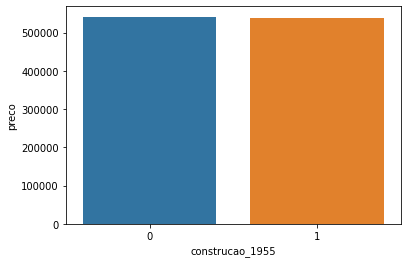

In [17]:
h2 = df[['preco','construcao_1955']].groupby('construcao_1955').mean().reset_index().sort_values(by='construcao_1955',ascending=False)
#plt.figure(figsize=(10,6))
sns.barplot( data=h2, x='construcao_1955', y='preco')

h2['percent'] = h2['preco'].pct_change()
print(f'H2 é falsa, pois os imóveis anteriores a 1955, são em média {h2.iloc[1,2]:.2%} mais caros.')

### H3: Imóveis sem porão possuem m2_construcao_total 50% maiores do que com porão, na média.

H3 é falsa, pois os imóveis sem porão são, em média, -18.56% maiores do que imóveis com porão.


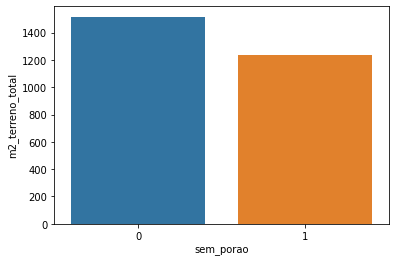

In [18]:
h3 = df[['m2_terreno_total','sem_porao']].groupby('sem_porao').mean().reset_index()
#plt.figure(figsize=(10,6))
sns.barplot( data=h3, x='sem_porao', y='m2_terreno_total')

h3['percent'] = h3['m2_terreno_total'].pct_change()
print(f'H3 é falsa, pois os imóveis sem porão são, em média, {h3.iloc[1,2]:.2%} maiores do que imóveis com porão.')

### H4: O Crescimento do preço dos imóveis YoY (Year over Year) é de 10%, em média.

H4 é falsa, pois o crescimento dos preços dos imóveis YoY, em média, é de 0.05%


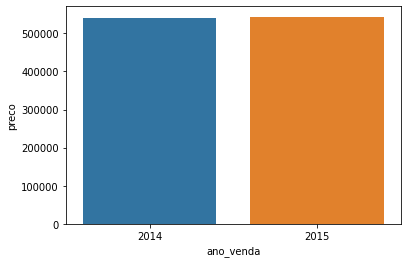

In [19]:
h4 = df[['preco','ano_venda']].groupby('ano_venda').mean().reset_index()

sns.barplot(data = h4, x = 'ano_venda', y = 'preco')

h4['percent'] = h4['ano_venda'].pct_change()
print(f'H4 é falsa, pois o crescimento dos preços dos imóveis YoY, em média, é de {h4.iloc[1,2]:.2%}')

### H5: Imóveis com 3 banheiros tem um crescimento médio no Preço MoM (Month of Month) de 15%.

H5 é falsa, os imóveis não possuem um crescimento MoM de 15%, pois ele prossui uma variação média no período de 1.07%


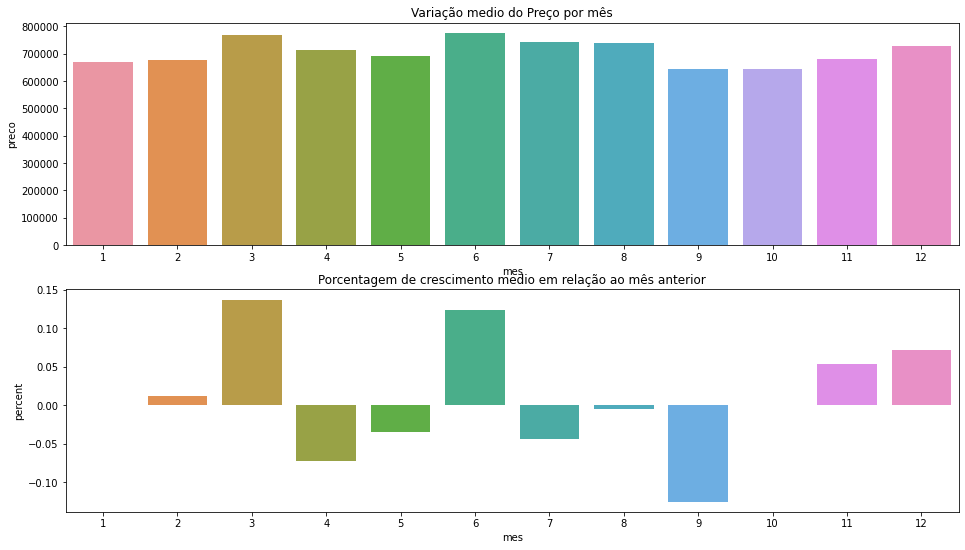

In [20]:
h5 = df[['preco','mes']].loc[df['banheiros']==3].groupby('mes').mean().reset_index()

h5['percent'] = h5['preco'].pct_change()
media_h5 = h5['percent'].mean()

fig = plt.figure( figsize = (16,9) )
specs = gridspec.GridSpec( ncols = 1, nrows = 2, figure=fig )
ax1 = fig.add_subplot( specs[0, 0] )
ax2 = fig.add_subplot( specs[1, 0] )

sns.barplot(data = h5, y='preco', x='mes', ax=ax1).set(title = 'Variação medio do Preço por mês')
sns.barplot(data = h5, y='percent', x='mes', ax=ax2).set(title = 'Porcentagem de crescimento medio em relação ao mês anterior')

print(f'H5 é falsa, os imóveis não possuem um crescimento MoM de 15%, pois ele prossui uma variação média no período de {media_h5:.2%}')

### H6: Imóveis no inverno são, em média, são 20% mais baratos do que o resto do ano.

H6 é falsa, pois em média o valor dos imóveis no inverno é -4.62% em comparação ao resto do ano.


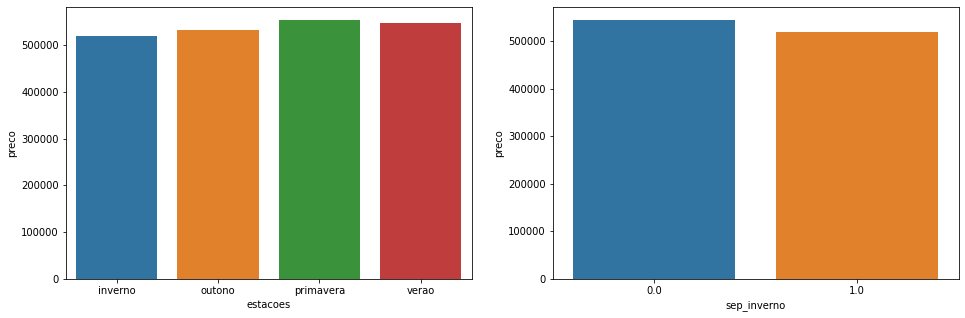

In [21]:
h6 = df[['preco', 'estacoes']].copy()

h6.loc[h6['estacoes'] == 'inverno', 'sep_inverno'] = 1
h6.loc[h6['estacoes'] != 'inverno', 'sep_inverno'] = 0

h6_1 = h6[['preco', 'estacoes']].groupby('estacoes').mean().reset_index()
h6_2 = h6[['preco', 'sep_inverno']].groupby('sep_inverno').mean().reset_index()

fig = plt.figure( figsize = (16,5) )
specs = gridspec.GridSpec( ncols = 2, nrows = 1, figure=fig )
ax1 = fig.add_subplot( specs[0, 0] )
ax2 = fig.add_subplot( specs[0, 1] )

sns.barplot( data=h6_1, x='estacoes', y='preco', ax=ax1)
sns.barplot( data=h6_2, x='sep_inverno', y='preco', ax=ax2)

h6_2['percent'] = h6_2['preco'].pct_change()

print(f'H6 é falsa, pois em média o valor dos imóveis no inverno é {h6_2.iloc[1,2]:.2%} em comparação ao resto do ano.')

### H7: Pelo menos 80% dos imóveis com condição 4 e 5 tem níveis de construção 7 ou mais.

H7 é verdadeira, pois os imóveis com boa condição representão 85.68%.
Sendo o total de imóveis em boa condção: 7332 e os imóveis com nível de construção 7 ou mais: 6282.


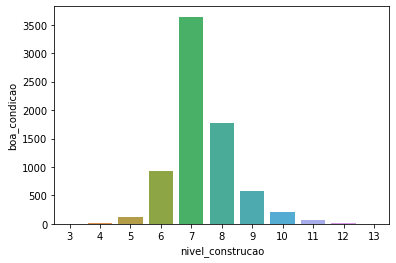

In [22]:
# Condição 4 e 5 = boa_condicao = 1
h7 = df[['boa_condicao','nivel_construcao']].loc[df['boa_condicao'] == 1].groupby('nivel_construcao').sum().reset_index()
sns.barplot( data=h7, x='nivel_construcao', y='boa_condicao')

h7_boa_condicao = h7['boa_condicao'].loc[h7['nivel_construcao'] >= 7].sum()
h7_todas_condicoes = h7['boa_condicao'].sum()
h7_paretto = h7_boa_condicao/h7_todas_condicoes
h7_paretto

print(f'H7 é verdadeira, pois os imóveis com boa condição representão {h7_paretto:.2%}.')
print(f'Sendo o total de imóveis em boa condção: {h7_todas_condicoes} e os imóveis com nível de construção 7 ou mais: {h7_boa_condicao}.')

### H8: Pelo menos 80% dos imóveis com vista para água possuem nível de construção 10 ou mais.

H8 é falsa, pois os imóveis com boa condição representão 36.20%.
Sendo o total de imóveis em boa condção: 163 e os imóveis com nível de construção 10 ou mais: 59.


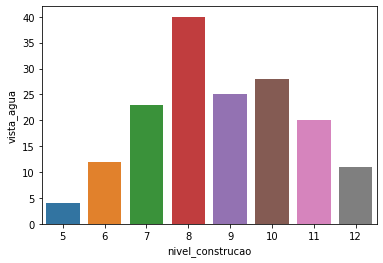

In [23]:
h8 = df[['vista_agua','nivel_construcao']].loc[df['vista_agua'] == 1].groupby('nivel_construcao').sum().reset_index()
sns.barplot( data=h8, x='nivel_construcao', y='vista_agua')

h8_vista_agua = h8['vista_agua'].loc[h8['nivel_construcao'] >= 10].sum()
h8_todas_condicoes = h8['vista_agua'].sum()
h8_paretto = h8_vista_agua/h8_todas_condicoes

print(f'H8 é falsa, pois os imóveis com boa condição representão {h8_paretto:.2%}.')
print(f'Sendo o total de imóveis em boa condção: {h8_todas_condicoes} e os imóveis com nível de construção 10 ou mais: {h8_vista_agua}.')

# 5. Questões de Negócio

## 5.1. Questões de Negócio: Quais são os melhores imóveis e por quanto comprar?

Como vou fazer isso?
1. Agrupar os imóveis por cep.
2. Realizar uma mediana do preço do imóvel. O valor dessa mediana será colocado em uma coluna.
3. Sugerir os imóveis que estejam a baixo do valor mediano e em boas condições, colocar essas casa com um marcador de comprar.
4. Criar uma coluna valor economizado com a compra dos imóveis. 

In [24]:
qn1 = df[['id','preco','boa_condicao','cep','estacoes']].copy()

# Calculando a mediana do preço de compra
qn1_median = qn1[[ 'preco','cep']].groupby('cep').median().reset_index()
qn1_median.rename(columns = { 'preco':'mediana_preco' }, inplace=True)

qn1 = pd.merge( qn1, qn1_median, on='cep', how='inner')

# Pode comprar = 1
# Não pode comprar = 0
qn1['comprar'] = 0
qn1.loc[ (qn1['boa_condicao'] == 1) & (qn1['preco'] < qn1['mediana_preco']), 'comprar' ] = 1
qn1.head()

,id,preco,boa_condicao,cep,estacoes,mediana_preco,comprar
0,7129300520,221900.0000,0,98178,outono,279000.0000,0
1,4060000240,205425.0000,1,98178,verao,279000.0000,1
2,4058801670,445000.0000,0,98178,verao,279000.0000,0
3,2976800796,236000.0000,0,98178,outono,279000.0000,0
4,6874200960,170000.0000,0,98178,inverno,279000.0000,0


### 5.1.1 Aprofundamento nas questôes de negócio.

1. Quantos imóveis estão aptos a serem comprados?
2. Qual o valor min median max dos imóveis?
3. Qual o somatório do valor de compra de todos os imóveis?
4. Qual será o valor economizado com a compra dos imóveis em relação a mediana?

In [25]:
aptos_compra = qn1.loc[qn1['comprar'] == 1].copy()

valor_imóvel = aptos_compra.describe().T
valor_imóvel.drop(['std','25%','75%'], axis=1, inplace=True)
valor_imóvel.drop(['cep','comprar','boa_condicao'], axis=0, inplace=True)
print(valor_imóvel)
valor_compra = aptos_compra['preco'].sum()

aptos_compra['economia'] = 0
aptos_compra['economia'] = aptos_compra.apply(lambda x : x['mediana_preco'] - x['preco'], axis=1)

valor_economizado = aptos_compra['economia'].sum()

print(f'O total de imóveis aptos a comprar são: {aptos_compra.shape[0]}')
print(f'O valor total do aporte para adiquirir os imóveis é: {valor_compra}')
print(f'O valor total de economia ao adiquirir todos os imóveis é: {valor_economizado}')

                  count            mean          min             50%  \
id            3777.0000 4426042737.0193 2800031.0000 3797001815.0000   
preco         3777.0000     392880.1199   89000.0000     350000.0000   
mediana_preco 3777.0000     492512.3462  235000.0000     435000.0000   

                          max  
id            9842300540.0000  
preco            1880000.0000  
mediana_preco    1905000.0000  
O total de imóveis aptos a comprar são: 3777
O valor total do aporte para adiquirir os imóveis é: 1483908213.0
O valor total de economia ao adiquirir todos os imóveis é: 376310918.5


## 5.2. Questões de Negócio: Qual o melhor período de venda dos imóveis e por quanto vender?

Como vou fazer isso?
1. Agrupar os imóveis por cep e por sazonalidade.
2. Criar uma coluna de mediana de preço conforme cep e sazonalidade.
3. Se o preço da compra for **maior** de a mediana da região e sazonalidade. O preco de venda é igual ao preço de compra + 10%.
4. Se o preço da compra for **menor** de a mediana da região e sazonalidade. O preco de venda é igual ao preço de compra + 30%.

In [26]:
qn2 = df[['id','preco','cep','estacoes']].copy()

qn2_median = qn2[['preco','cep','estacoes']].groupby(['cep','estacoes']).median().reset_index()
qn2_median.rename(columns = { 'preco':'mediana_preco' }, inplace=True)

qn2 = pd.merge( qn2, qn2_median, on=['cep','estacoes'], how='inner')

qn2['preco_venda'] = qn2[['mediana_preco','preco']].apply(lambda x: (x['preco']*1.1) if x['preco'] >= x['mediana_preco']
                                                                    else (x['preco']*1.3), axis=1)

qn2['lucro_venda'] = qn2['preco_venda'] - qn2['preco']
print(qn2.shape)
qn2.head(10)

(21436, 7)


,id,preco,cep,estacoes,mediana_preco,preco_venda,lucro_venda
0,7129300520,221900.0000,98178,outono,290500.0000,288470.0000,66570.0000
1,2976800796,236000.0000,98178,outono,290500.0000,306800.0000,70800.0000
2,1180003090,190000.0000,98178,outono,290500.0000,247000.0000,57000.0000
3,2171400197,350000.0000,98178,outono,290500.0000,385000.0000,35000.0000
4,1180002378,299000.0000,98178,outono,290500.0000,328900.0000,29900.0000
5,1180500070,335000.0000,98178,outono,290500.0000,368500.0000,33500.0000
6,179000350,194000.0000,98178,outono,290500.0000,252200.0000,58200.0000
7,3810000202,251700.0000,98178,outono,290500.0000,327210.0000,75510.0000
8,4058802105,150000.0000,98178,outono,290500.0000,195000.0000,45000.0000
9,7878400135,355000.0000,98178,outono,290500.0000,390500.0000,35500.0000


#### 5.2.1 Aprofundamento nas questões de negócio.

1. Qual será a lucratividade conforme os preços de venda?
2. Quanto vai ser a lucratividade por sazonalidade?

In [27]:
aptos_venda = qn2.copy()
aptos_venda = pd.merge(aptos_venda,aptos_compra[['id','mediana_preco','economia','preco']], on='id',how='right')
aptos_venda.rename(columns={'mediana_preco_x':'mediana_preco_venda','mediana_preco_y':'mediana_preco_compra',
                            'preco':'preco_compra'},inplace=True)

lucro_venda = aptos_venda['lucro_venda'].sum()
lucro_sazonalidade = aptos_venda[['lucro_venda','estacoes']].groupby('estacoes').sum().reset_index()

print(f'A lucratividade total estimada é de: {lucro_venda:,.2f}')
print(f'A lucratividade por sazonalidade estimada é de:')
print(lucro_sazonalidade)

A lucratividade total estimada é de: 426,715,962.90
A lucratividade por sazonalidade estimada é de:
    estacoes    lucro_venda
0    inverno  68919033.3000
1     outono 100162214.6000
2  primavera 119287887.8000
3      verao 138346827.2000
